In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
ds = pd.read_csv('../datasets/equake_clean.csv')
ds.head()

,Unnamed: 0,name,equake_near,material type,age of bridge,bridge type,magnitude,d to epicenter in miles,damaged,I,II,III
0,0,"San Francisco-Oakland Bay Bridge, 1936","1989, Loma Prieta",I,53,III,6.9,59.9,1,0,0,1
1,1,San Francisco-Oakland Bay Bridge,Northern California,I,57,III,4.7,50.0,0,1,0,0
2,2,San Francisco-Oakland Bay Bridge,Bay Area,I,67,III,4.0,6.9,0,1,0,0
3,3,San Francisco-Oakland Bay Bridge,1km N of Piedmont,I,79,III,4.0,6.3,0,1,0,0
4,4,San Francisco-Oakland Bay Bridge,2km SE of Berkeley,I,82,III,4.4,5.4,0,1,0,0


In [20]:
X = ds.iloc[:, 3:-4].values
y = ds.iloc[:, 8: ].values

In [21]:
print(X)

[['I' 53 'III' 6.9 59.9]
 ['I' 57 'III' 4.7 50.0]
 ['I' 67 'III' 4.0 6.9]
 ...
 ['I' 17 'I' 6.6 56.3]
 ['I' 53 'I' 4.5 26.6]
 ['I' 54 'I' 4.4 45.7]]


In [22]:
print(y)

[[1 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 0]

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
print(X)

[[1.0 0.0 0.0 ... 53 6.9 59.9]
 [1.0 0.0 0.0 ... 57 4.7 50.0]
 [1.0 0.0 0.0 ... 67 4.0 6.9]
 ...
 [1.0 0.0 1.0 ... 17 6.6 56.3]
 [1.0 0.0 1.0 ... 53 4.5 26.6]
 [1.0 0.0 1.0 ... 54 4.4 45.7]]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
print(X_train)

[[ 0.88795357 -0.88795357 -1.82361767 ...  1.68284273 -1.24284247
   1.37193343]
 [ 0.88795357 -0.88795357 -1.82361767 ...  1.99041766  1.72421521
   2.80101334]
 [-1.12618501  1.12618501  0.54836056 ... -0.00881935  1.3751496
  -0.51252686]
 ...
 [ 0.88795357 -0.88795357 -1.82361767 ... -0.82901915 -0.80651046
  -0.8679457 ]
 [-1.12618501  1.12618501  0.54836056 ... -1.18785656 -0.98104327
  -0.95309813]
 [-1.12618501  1.12618501  0.54836056 ... -0.72649418  2.24781362
   1.01281232]]


In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [29]:
y_pred = classifier.predict(X_test)

[Text(289.33333333333337, 362.6666666666667, 'X[7] <= 1.244\nentropy = 0.323\nsamples = 186\nvalue = [[171, 15]\n[15, 171]\n[180, 6]\n[177, 9]]'),
 Text(248.0, 320.0, 'entropy = 0.0\nsamples = 160\nvalue = [[160, 0]\n[0, 160]\n[160, 0]\n[160, 0]]'),
 Text(330.6666666666667, 320.0, 'X[8] <= 1.731\nentropy = 0.919\nsamples = 26\nvalue = [[11, 15]\n[15, 11]\n[20, 6]\n[17, 9]]'),
 Text(248.0, 277.33333333333337, 'X[7] <= 1.899\nentropy = 0.76\nsamples = 16\nvalue = [[2, 14]\n[14, 2]\n[10, 6]\n[8, 8]]'),
 Text(206.66666666666669, 234.66666666666669, 'X[7] <= 1.462\nentropy = 0.717\nsamples = 12\nvalue = [[2, 10]\n[10, 2]\n[10, 2]\n[4, 8]]'),
 Text(165.33333333333334, 192.0, 'X[8] <= -0.674\nentropy = 0.821\nsamples = 9\nvalue = [[2, 7]\n[7, 2]\n[7, 2]\n[4, 5]]'),
 Text(82.66666666666667, 149.33333333333334, 'X[8] <= -0.816\nentropy = 0.361\nsamples = 5\nvalue = [[0, 5]\n[5, 0]\n[4, 1]\n[1, 4]]'),
 Text(41.333333333333336, 106.66666666666669, 'entropy = 0.0\nsamples = 3\nvalue = [[0, 3]\n[3,

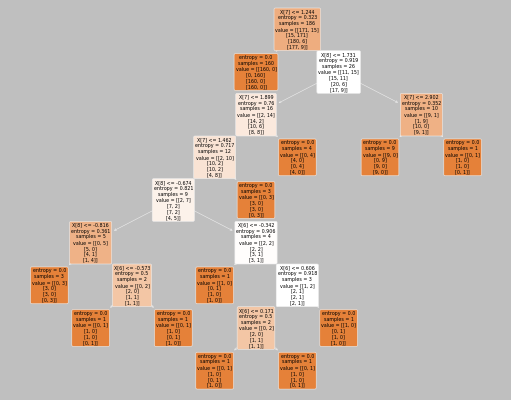

In [50]:
from sklearn import tree

tree.plot_tree(classifier, filled = True, rounded = True)

In [42]:
plt.style.available


['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [49]:
plt.style.use('bmh')

In [31]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.942512077294686

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9269323671497585

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')